In [12]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# importowanie csv do ramki danych
houses = pd.read_csv('Houses.csv',encoding = "ISO-8859-1")
houses.head(50)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.00,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.00,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.00,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.00,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.00,5.0,105.00,2020.0
5,5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2.0,26071.0,50.046943,19.997153,414600.00,1.0,34.55,2022.0
6,6,Podgórze P³aszów Koszykarska,Kraków,0.0,22569.0,50.049893,19.990603,750000.00,4.0,81.40,2021.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.00,6.0,280.00,2003.0
8,8,Ursynów Wy¿yny,Warszawa,3.0,11387.0,52.140282,21.056345,615000.00,4.0,63.40,1982.0
9,9,Bemowo,Warszawa,1.0,10904.0,52.238974,20.913288,429000.00,1.0,40.00,1999.0


In [13]:
# analiza danych statystycznych
print(houses.describe())
print(houses.info())
print(houses.isnull().values.any())

houses

         Unnamed: 0         floor            id      latitude     longitude  \
count  23764.000000  23764.000000  23764.000000  23764.000000  23764.000000   
mean   11881.500000      2.808744  15621.964484     51.374874     19.861773   
std     6860.220235      2.463467   8617.293898      1.099836      1.447186   
min        0.000000      0.000000      1.000000     49.933056      4.204796   
25%     5940.750000      1.000000   8420.750000     50.066489     19.916563   
50%    11881.500000      2.000000  15637.500000     52.193987     19.999330   
75%    17822.250000      4.000000  23111.250000     52.267594     20.996180   
max    23763.000000     10.000000  30308.000000     54.435238     30.319403   

              price         rooms            sq         year  
count  2.376400e+04  23764.000000  2.376400e+04  23764.00000  
mean   6.493536e+05      2.620771  1.027249e+02   2000.55117  
std    5.326970e+05      0.996530  6.533688e+03     48.31402  
min    5.000000e+03      1.000000  8

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
...,...,...,...,...,...,...,...,...,...,...,...
23759,23759,Stare Miasto Naramowice,Poznañ,0.0,3976.0,52.449649,16.949408,543000.0,4.0,77.00,2020.0
23760,23760,W³ochy,Warszawa,4.0,10206.0,52.186109,20.948438,910000.0,3.0,71.00,2017.0
23761,23761,Nowe Miasto Malta ul. Katowicka,Poznañ,0.0,4952.0,52.397345,16.961939,430695.0,3.0,50.67,2022.0
23762,23762,Podgórze Duchackie Walerego S³awka,Kraków,6.0,24148.0,50.024231,19.959569,359000.0,2.0,38.86,2021.0


<AxesSubplot: >

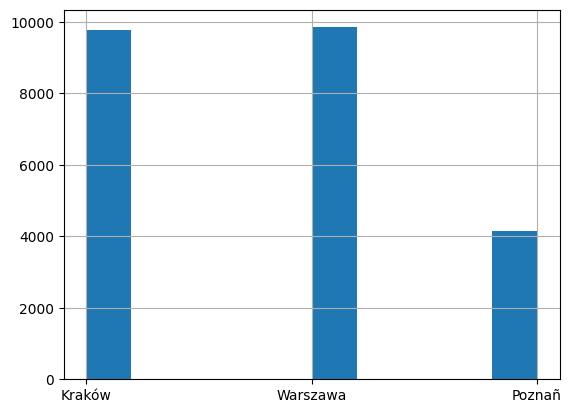

In [14]:
# rozkład miast
houses['city'].hist() 

In [15]:
#Kodowanie etykiet - one hot encoding
cities = pd.get_dummies(houses['city'])
houses = pd.merge(
    left=houses,
    right=cities,
    left_index=True,
    right_index=True,
)
print(houses.head())

   Unnamed: 0                                            address      city  \
0           0           Podgórze Zab³ocie Stanis³awa Klimeckiego    Kraków   
1           1                          Praga-Po³udnie Grochowska  Warszawa   
2           2                            Krowodrza Czarnowiejska    Kraków   
3           3                                           Grunwald    Poznañ   
4           4  Ochota Gotowy budynek. Stan deweloperski. Osta...  Warszawa   

   floor       id   latitude  longitude      price  rooms      sq    year  \
0    2.0  23918.0  50.049224  19.970379   749000.0    3.0   74.05  2021.0   
1    3.0  17828.0  52.249775  21.106886   240548.0    1.0   24.38  2021.0   
2    2.0  22784.0  50.066964  19.920025   427000.0    2.0   37.00  1970.0   
3    2.0   4315.0  52.404212  16.882542  1290000.0    5.0  166.00  1935.0   
4    1.0  11770.0  52.212225  20.972630   996000.0    5.0  105.00  2020.0   

   Kraków  Poznañ  Warszawa  
0       1       0         0  
1       

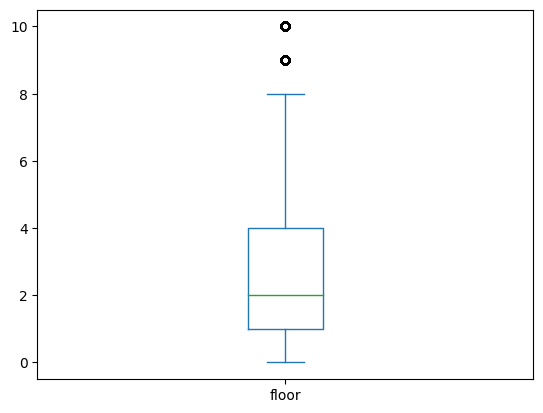

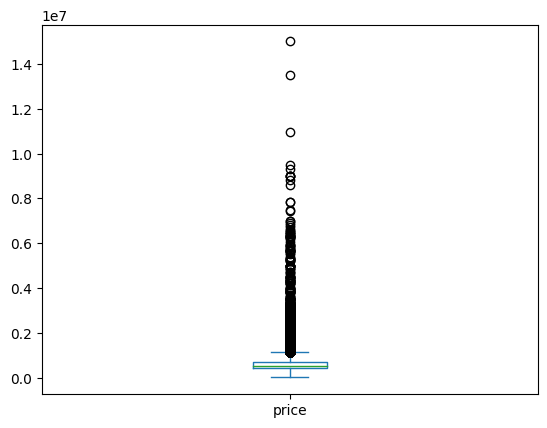

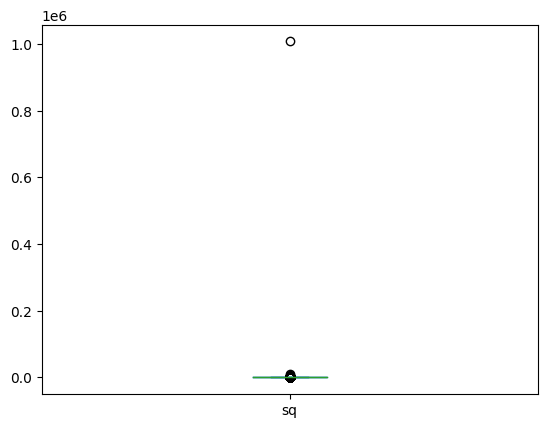

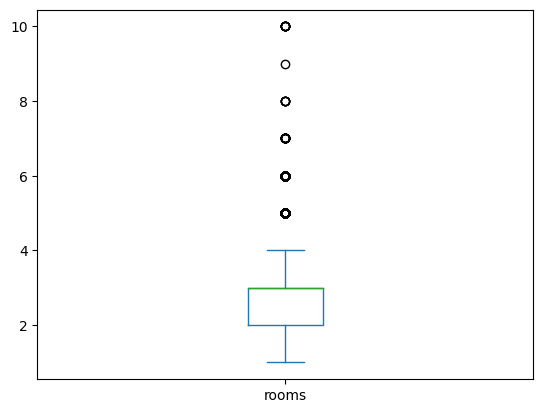

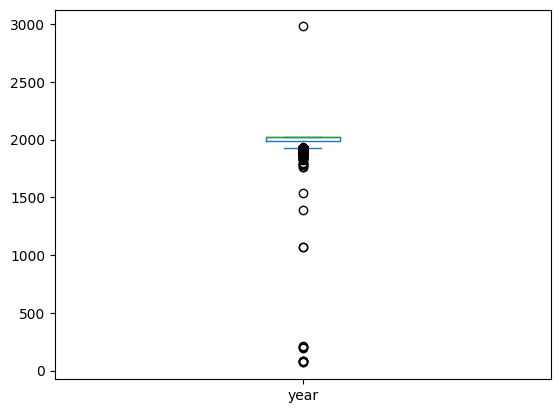

In [16]:
# rozkład danych
houses['floor'].plot(kind='box')
plt.show()
houses['price'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box') 
plt.show()
houses['rooms'].plot(kind='box') 
plt.show()
houses['year'].plot(kind='box')
plt.show()

In [17]:
# Usunięcie niepotyrzebnych danych
del houses['address']
del houses['id']
del houses['Unnamed: 0']
del houses['city']
houses.head()

,floor,latitude,longitude,price,rooms,sq,year,Kraków,Poznañ,Warszawa
0,2.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0,1,0,0
1,3.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0,0,0,1
2,2.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0,1,0,0
3,2.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0,0,1,0
4,1.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0,0,0,1


In [18]:
#usunięcie wartości odstajacych danych
houses = houses.drop(houses[houses.year < 1800].index)
houses = houses.drop(houses[houses.year > 2022].index)
houses = houses.drop(houses[houses.sq > 500].index)

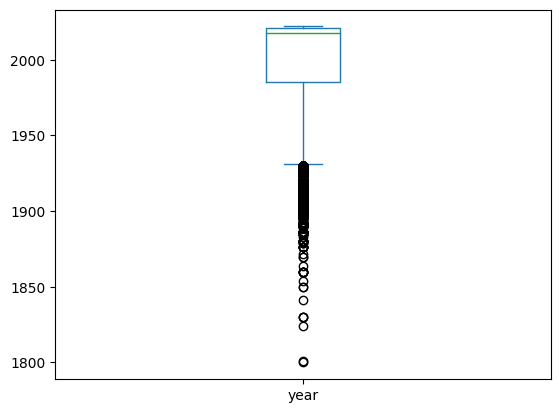

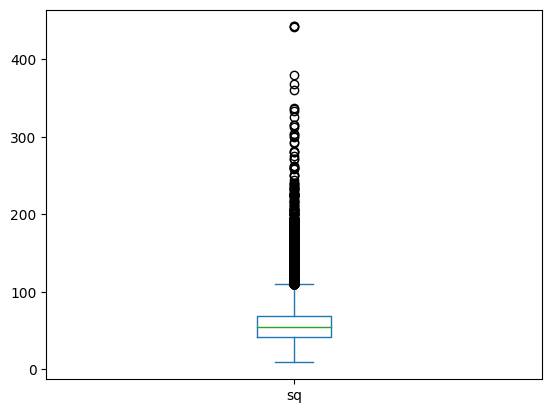

In [19]:
houses['year'].plot(kind='box')
plt.show()
houses['sq'].plot(kind='box')
plt.show()

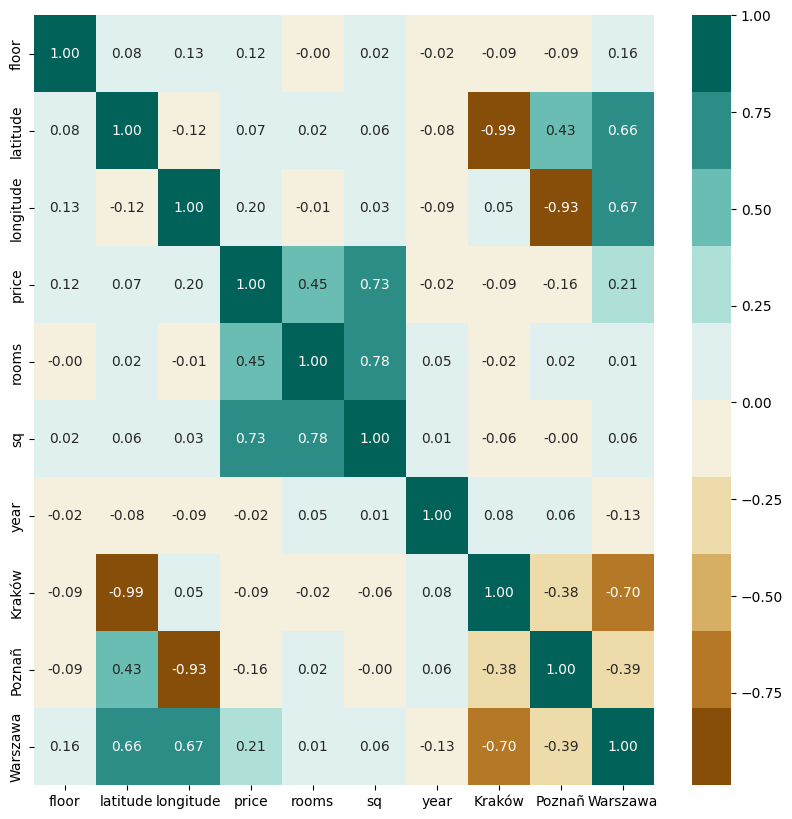

In [20]:
# wyznaczenie macierzy korelacji

correlations = houses.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

plt.show()

In [21]:
# zbiór danych
X = houses.drop('price', axis=1).to_numpy()
X

array([[ 2.       , 50.0492242, 19.9703793, ...,  1.       ,  0.       ,
         0.       ],
       [ 3.       , 52.2497745, 21.1068857, ...,  0.       ,  0.       ,
         1.       ],
       [ 2.       , 50.0669642, 19.9200249, ...,  1.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       , 52.3973449, 16.9619394, ...,  0.       ,  1.       ,
         0.       ],
       [ 6.       , 50.0242313, 19.959569 , ...,  1.       ,  0.       ,
         0.       ],
       [ 2.       , 52.141039 , 21.0323214, ...,  0.       ,  0.       ,
         1.       ]])

In [22]:
# zbiór etykiet
y = houses.loc[:, 'price'].to_numpy()
y

array([749000., 240548., 427000., ..., 430695., 359000., 604800.])

In [23]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345) 

In [24]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    score_vals = [
        metrics.mean_squared_error(predictions, y_test),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [25]:
# MODEL 1 - regresja liniowa
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [139728263262.03406, 162694.8630618483]
random forrest tree [57616862592.42822, 71711.72276372142]


<AxesSubplot: >

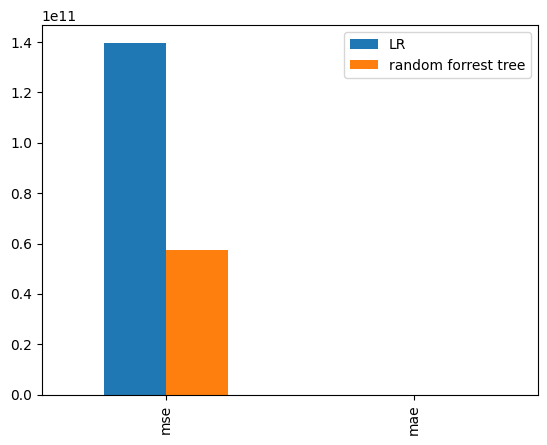

In [26]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['mse', 'mae'])
df_compare.plot(kind='bar')

In [27]:
# test manualny
regressor.predict([[2.0, 50.049224, 19.970379, 3.0, 74.05, 2021.0, 1, 0, 0]]) #prawidłowa wartość 749000.0

array([748500.])

In [28]:
# działania korygujące - hiperparametry

# MODEL 3 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

random forrest tree [56453332920.19657, 70981.75211458471]
